##  TASK 3 : Customer Segmentation Analysis with Python .

Customer segmentation analysis involves dividing a company's customer base into distinct groups or segments based on certain characteristics or behaviors. These segments can help businesses better understand their customers, tailor marketing strategies, and make more informed business decisions. Here's how you can perform customer segmentation analysis using Python:

In [ ]:
# importing the necessary libraries from python module
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [ ]:
# Reading the CSV (Common separted values) file in the code
df = pd.read_csv('/content/Mall Customer Segmentation Data.csv')
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
#fetching the requied data or features
data = df[['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']]

In [ ]:
# Reading the top 5 values of the table
data.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [ ]:
data.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [ ]:
data.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [ ]:
scaler = StandardScaler()
new_data = scaler.fit_transform(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

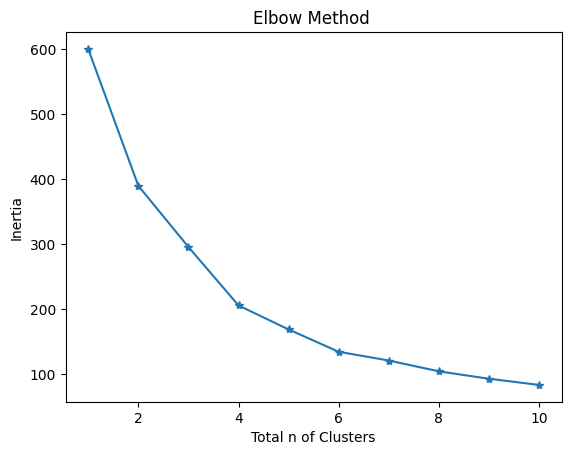

In [ ]:
indiviual_cluster = []
for i in range(1,11):
  kmeans = KMeans(n_clusters = i,  random_state = 42)
  kmeans.fit(new_data)
  indiviual_cluster.append(kmeans.inertia_)

plt.plot(range(1,11), indiviual_cluster, marker = '*')
plt.title('Elbow Method ')
plt.xlabel('Total n of Clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
optimal_clusters = 7
kmeans = KMeans(n_clusters = optimal_clusters , random_state = 42)
cluster_labels = kmeans.fit_predict(new_data)

data['cluster'] = cluster_labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-78-62d096594caf>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cluster'] = cluster_labels


In [ ]:
cluster_centers = kmeans.cluster_centers_
cluster_center_df = pd.DataFrame(cluster_centers, columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])

for i in range(optimal_clusters):
    print("Cluster", i)
    print(cluster_center_df.iloc[i])
    print()


Cluster 0
Age                      -0.850435
Annual Income (k$)       -0.148941
Spending Score (1-100)   -0.041478
Name: 0, dtype: float64

Cluster 1
Age                       1.255265
Annual Income (k$)       -0.261669
Spending Score (1-100)   -0.031587
Name: 1, dtype: float64

Cluster 2
Age                      -0.441917
Annual Income (k$)        0.991583
Spending Score (1-100)    1.239503
Name: 2, dtype: float64

Cluster 3
Age                      -0.602012
Annual Income (k$)        1.103155
Spending Score (1-100)   -1.429231
Name: 3, dtype: float64

Cluster 4
Age                       0.478957
Annual Income (k$)       -1.308230
Spending Score (1-100)   -1.196444
Name: 4, dtype: float64

Cluster 5
Age                       0.679500
Annual Income (k$)        1.028284
Spending Score (1-100)   -1.188293
Name: 5, dtype: float64

Cluster 6
Age                      -0.993969
Annual Income (k$)       -1.347348
Spending Score (1-100)    1.064048
Name: 6, dtype: float64



In [ ]:
# Evaluate the quality of clusters using silhouette score
silhouette_avg = silhouette_score(new_data, cluster_labels)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.4111545340123845


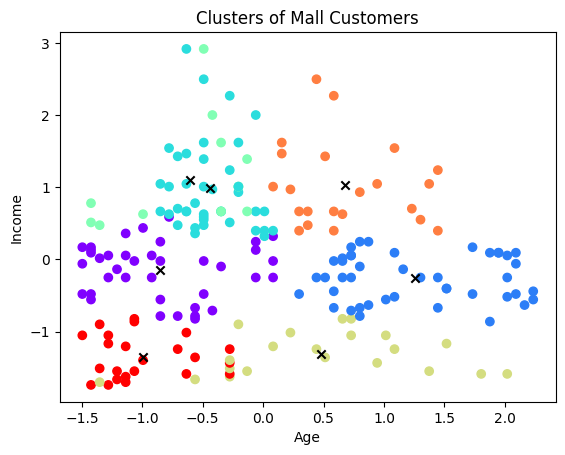

In [ ]:
# Visualize the clusters
plt.scatter(new_data[:, 0], new_data[:, 1], c=cluster_labels, cmap='rainbow')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='black', marker='x')
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Clusters of Mall Customers')
plt.show()
